# Data Exploration

## Background 

### Data Source
The data used in this notebook is sourced from the National Centers for Environmental Information (NCEI): [Global Historical Climatology Network (GHCN) - Hourly](https://www.ncei.noaa.gov/products/global-historical-climatology-network-hourly). Refer to their documentation and terms of use.


#### Data Set

Station_ID: the station identification code. The first two characters signify the FIPS country code, the third character is a network code identifying the station numbering system used, and the remaining eight characters contain the actual station ID.

Station_Name: the name of the station.

Year: the year the observation was taken in Coordinated Universal Time (UTC).

Month: the month the observation was taken in Coordinated Universal Time (UTC).

Day: the day the observation was taken in Coordinated Universal Time (UTC).

Hour: the hour the observation was taken in Coordinated Universal Time (UTC).

Latitude: latitude of the station (in decimal degrees). North (+); South (-).

Longitude: the longitude of the station (in decimal degrees). East (+); West (-).

Temperature: 2 meter (circa) Above Ground Level Air (dry bulb) Temperature (⁰C to tenths)


Notes: 
- Raw data was removed in download_ghcn.py for storage purposes.
- GHCN hourly dataset contained psv files for individual stations in specific years. When processing the data, it was converted to csv format files for all California stations in years 2003 - 2023.
- Most columns were dropped as they were not needed. Columns kept were described above.
- Duplicate rows that had completely same column values were dropped.

# Data Cleaning

### Set up

In [1]:
import pandas as pd # type: ignore
import numpy as np
import sys
import os

# Update paths to get source code from notebook_utils

curr_dir = os.path.dirname(os.path.abspath('notebooks'))
proj_dir = os.path.dirname(curr_dir)
src_path = os.path.join(proj_dir, 'src')
sys.path.append(src_path)

from notebook_utils.preprocessing import *

# create a combined dataframe for all reduced csv files
dfs = combine_files_to_dfs("../data/ghcn_reduced")
CA_stations = pd.concat(dfs, ignore_index=True) # type: ignore

# Create a list of individual dataframes and put them into a list
dataframes = combine_files_to_dfs("../data/ghcn_reduced")

Processed file: reduced_CA_stations_2003.csv
Processed file: reduced_CA_stations_2004.csv
Processed file: reduced_CA_stations_2005.csv
Processed file: reduced_CA_stations_2006.csv
Processed file: reduced_CA_stations_2007.csv
Processed file: reduced_CA_stations_2008.csv
Processed file: reduced_CA_stations_2009.csv
Processed file: reduced_CA_stations_2010.csv
Processed file: reduced_CA_stations_2011.csv
Processed file: reduced_CA_stations_2012.csv
Processed file: reduced_CA_stations_2013.csv
Processed file: reduced_CA_stations_2014.csv
Processed file: reduced_CA_stations_2015.csv
Processed file: reduced_CA_stations_2016.csv
Processed file: reduced_CA_stations_2017.csv
Processed file: reduced_CA_stations_2018.csv
Processed file: reduced_CA_stations_2019.csv
Processed file: reduced_CA_stations_2020.csv
Processed file: reduced_CA_stations_2021.csv
Processed file: reduced_CA_stations_2022.csv
Processed file: reduced_CA_stations_2023.csv
Processed file: reduced_CA_stations_2003.csv
Processed 

### Data Examination

In [2]:
CA_stations.head()

,Station_ID,Station_name,Year,Month,Day,Hour,Latitude,Longitude,temperature
0,USW00023225,BLUE CANYON NYACK AP,2003,1,1,0,39.2761,-120.7092,-1.1
1,USW00023225,BLUE CANYON NYACK AP,2003,1,1,1,39.2761,-120.7092,-1.1
2,USW00023225,BLUE CANYON NYACK AP,2003,1,1,2,39.2761,-120.7092,-1.1
3,USW00023225,BLUE CANYON NYACK AP,2003,1,1,3,39.2761,-120.7092,-1.7
4,USW00023225,BLUE CANYON NYACK AP,2003,1,1,4,39.2761,-120.7092,-2.2


In [3]:
CA_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19851938 entries, 0 to 19851937
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Station_ID    object 
 1   Station_name  object 
 2   Year          int64  
 3   Month         int64  
 4   Day           int64  
 5   Hour          int64  
 6   Latitude      float64
 7   Longitude     float64
 8   temperature   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.3+ GB


In [4]:
CA_stations.describe()

,Year,Month,Day,Hour,Latitude,Longitude,temperature
count,1.985194e+07,1.985194e+07,1.985194e+07,1.985194e+07,1.985194e+07,1.985194e+07,1.961237e+07
mean,2.013089e+03,6.504389e+00,1.573293e+01,1.159572e+01,3.668450e+01,-1.201430e+02,1.561475e+01
std,5.375401e+00,3.467041e+00,8.794091e+00,6.939050e+00,2.374357e+00,2.021136e+00,8.620436e+00
min,2.003000e+03,1.000000e+00,1.000000e+00,0.000000e+00,3.256810e+01,-1.242381e+02,-9.900000e+01
25%,2.009000e+03,3.000000e+00,8.000000e+00,6.000000e+00,3.441420e+01,-1.218150e+02,1.050000e+01
50%,2.013000e+03,7.000000e+00,1.600000e+01,1.200000e+01,3.698500e+01,-1.204667e+02,1.470000e+01
75%,2.018000e+03,1.000000e+01,2.300000e+01,1.800000e+01,3.832080e+01,-1.182911e+02,2.000000e+01
max,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,4.178360e+01,-1.161472e+02,9.020000e+02


The temperature column has a really high max celsius value which is 902 degrees celsius. This is unreasonably high. After doing some searching, we found that the highest recorded temperature value was 56.7 degrees celsius in California 1913. 

There is also an unreasonably low temperature observation of -99 degrees celsius since the lowest recorded temperature observation on Earth was -98 degrees in Antartica. 

# Cleaning Invalid Data

- Handle Missing Values  (e.g., mean/median impuation, interpolation, forward or backward fill, k-nearest neighbors imputation, deletion)
- Handle Outliers  (e.g., visual inspection by boxplots, Z-score and IQR method, or data transformation by log transformation and winsorization)
- Handle inconsistencies (e.g., checking ranges to ensure temperature values fall within a reasonable range, unit consistency, string matching and standardization), and duplicates (identify and remove duplicates) in the dataset

Notes:
- For non-leap years, there should be 8760 rows (for each hour) for each station.
- For leap years, there should be 8784 rows (for each hour) for each station
- Leap years from 2003-2023 include: 2004, 2008, 2012, 2016, and 2020
- The reduced files contain 99 CA stations.
- Some stations are not observed each year from 2003-2023.


## Handling Inconsistencies

1. Ensure temperature observations are within -50°C and 60°C
2. Temperature values above the reasonable range will be converted to NaN.

In [5]:
# Check how many rows are below -50 and above 60 degrees celsius
CA_stations[(CA_stations['temperature'] < -50) | (CA_stations['temperature'] > 60)]

,Station_ID,Station_name,Year,Month,Day,Hour,Latitude,Longitude,temperature
1439248,USW00093104,CHINA LAKE NAF,2005,3,21,12,35.6864,-117.6908,80.3
1440726,USW00093104,CHINA LAKE NAF,2005,5,20,2,35.6864,-117.6908,83.0
1448841,USW00093107,SAN DIEGO MIRAMAR NAS,2005,3,16,11,32.8667,-117.1333,78.0
1457459,USW00093107,SAN DIEGO MIRAMAR NAS,2005,9,23,2,32.8667,-117.1333,-78.0
1458755,USW00093107,SAN DIEGO MIRAMAR NAS,2005,10,21,22,32.8667,-117.1333,78.0
...,...,...,...,...,...,...,...,...,...
19654066,USW00023289,PALO ALTO,2023,2,8,17,37.4667,-122.1167,80.0
19772424,USW00093193,FRESNO YOSEMITE INTL,2023,5,15,16,36.7800,-119.7203,227.0
19781493,USW00093201,TRUCKEE AP,2023,5,23,15,39.3200,-120.1394,70.0
19829035,USW00093231,SAN CARLOS AP,2023,2,10,15,37.5167,-122.2500,70.0


In [6]:
# Write code to turn temperature outside of the specified range into NaN
CA_stations.loc[(CA_stations['temperature'] < -50) | (CA_stations['temperature'] > 60), 'temperature'] = np.nan

## Deleting Duplicate Rows

There are rows with the same value in each column except temperature. In these cases we will average out the temperature observations and delete the extra rows.

In [7]:
grouped_df = CA_stations.groupby(['Station_ID', 'Station_name', 'Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude']).agg({'temperature': 'mean'}).reset_index()
CA_stations = grouped_df

## Handling Missing Values

### Filling missing rows

In [8]:
# create a reference dataframe with all stations with hours from 2003 to 2023
full_df = create_full_df()

99


In [9]:
full_df.describe()

,datetime,Year,Month,Day,Hour,Latitude,Longitude,temperature
count,17715456,1.771546e+07,1.771546e+07,1.771546e+07,1.771546e+07,0.0,0.0,0.0
mean,2013-03-16 23:30:00.000041728,2.012712e+03,6.451851e+00,1.572747e+01,1.150000e+01,NaN,NaN,NaN
min,2003-01-01 00:00:00,2.003000e+03,1.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,2008-02-07 23:45:00,2.008000e+03,3.000000e+00,8.000000e+00,5.750000e+00,NaN,NaN,NaN
50%,2013-03-16 23:30:00,2.013000e+03,6.000000e+00,1.600000e+01,1.150000e+01,NaN,NaN,NaN
75%,2018-04-23 23:15:00,2.018000e+03,9.000000e+00,2.300000e+01,1.725000e+01,NaN,NaN,NaN
max,2023-05-31 23:00:00,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,NaN,NaN,NaN
std,NaN,5.896072e+00,3.455160e+00,8.799113e+00,6.922187e+00,NaN,NaN,NaN


In [10]:
# Fill in completely missing rows
missing_rows = find_missing_rows(full_df, CA_stations)
CA_stations = add_missing_rows(CA_stations, missing_rows)

In [11]:
error = check_station_rows(CA_stations)
print(error)

       Station_ID  Year  Row_Count  Expected_Row_Count
20    USW00023222  2023       3624                3924
41    USW00023224  2023       3624                3924
62    USW00023225  2023       3624                3924
83    USW00023226  2023       3624                3924
104   USW00023230  2023       3624                3924
...           ...   ...        ...                 ...
1994  USW00093242  2023       3624                3924
2015  USW00093243  2023       3624                3924
2036  USW00093244  2023       3624                3924
2057  USW00093245  2023       3624                3924
2078  USW00094299  2023       3624                3924

[99 rows x 4 columns]


In [12]:
CA_stations.head()

,Station_ID,Station_name,Year,Month,Day,Hour,Latitude,Longitude,temperature
11799709,USW00023222,NaN,2003,1,1,0,NaN,NaN,NaN
11799710,USW00023222,NaN,2003,1,1,1,NaN,NaN,NaN
11799711,USW00023222,NaN,2003,1,1,2,NaN,NaN,NaN
11799712,USW00023222,NaN,2003,1,1,3,NaN,NaN,NaN
11799713,USW00023222,NaN,2003,1,1,4,NaN,NaN,NaN


### Station Deletion

Stations with no Station_name values will be dropped as that means there are no observations recorded for them at all from 2003 - 2023
- This is because the above Station_name for missing rows were filled in by using the Station_name used from a filled column with the same Station_ID.

In [13]:
CA_stations.dropna(subset=['Station_name'], inplace=True)   # 21 stations dropped

## Filling missing temperature values

In [14]:
null_count = CA_stations.isna().sum()
null_percent = (null_count/CA_stations.shape[0]) * 100
print(f'Percentage of null values for each column: \n{null_percent}')

Percentage of null values for each column: 
Station_ID       0.000000
Station_name     0.000000
Year             0.000000
Month            0.000000
Day              0.000000
Hour             0.000000
Latitude         0.000000
Longitude        0.000000
temperature     16.623515
dtype: float64


### Missing Temperature Values: Handling large gaps in temperature observations

We define a "large gap" as being a gap in the temperature column that is more than a day.

Large gaps in temperature observations will be handled via interpolation

#### Cubic Spline Interpolation for large gaps of missing temperature values

In [15]:
from notebook_utils.preprocessing import cubic_spline_interpolate

CA_interpolated_df = cubic_spline_interpolate(CA_stations,gap_hours=24)

In [16]:
CA_interpolated_df.head()

,Station_ID,Station_name,Year,Month,Day,Hour,Latitude,Longitude,temperature
0,USW00023224,AUBURN MUNI AP,2003,1,1,0,38.9547,-121.0819,11.0
139,USW00023224,AUBURN MUNI AP,2003,1,1,1,38.9547,-121.0819,9.9
226,USW00023224,AUBURN MUNI AP,2003,1,1,2,38.9547,-121.0819,8.8
297,USW00023224,AUBURN MUNI AP,2003,1,1,3,38.9547,-121.0819,8.1
316,USW00023224,AUBURN MUNI AP,2003,1,1,4,38.9547,-121.0819,7.4


In [17]:
null_count = CA_interpolated_df.isna().sum()
null_percent = (null_count/CA_interpolated_df.shape[0]) * 100
print(f'Percentage of null values for each column: \n{null_percent}')

Percentage of null values for each column: 
Station_ID      0.000000
Station_name    0.000000
Year            0.000000
Month           0.000000
Day             0.000000
Hour            0.000000
Latitude        0.000000
Longitude       0.000000
temperature     0.001118
dtype: float64


### Missing Temperature Values: Handling short gaps in temperature observations

We define a "short gap" as being a gap in the temperature column that is less than a day. 

Short gaps in temperature observations will be handled with forward/backward fill.

In [18]:
final_df = fill_gaps(CA_interpolated_df)

In [19]:
null_count = final_df.isna().sum()
null_percent = (null_count/final_df.shape[0]) * 100
print(f'Percentage of null values for each column: \n{null_percent}')

Percentage of null values for each column: 
Station_ID      0.0
Station_name    0.0
Year            0.0
Month           0.0
Day             0.0
Hour            0.0
Latitude        0.0
Longitude       0.0
temperature     0.0
dtype: float64


#### Validation

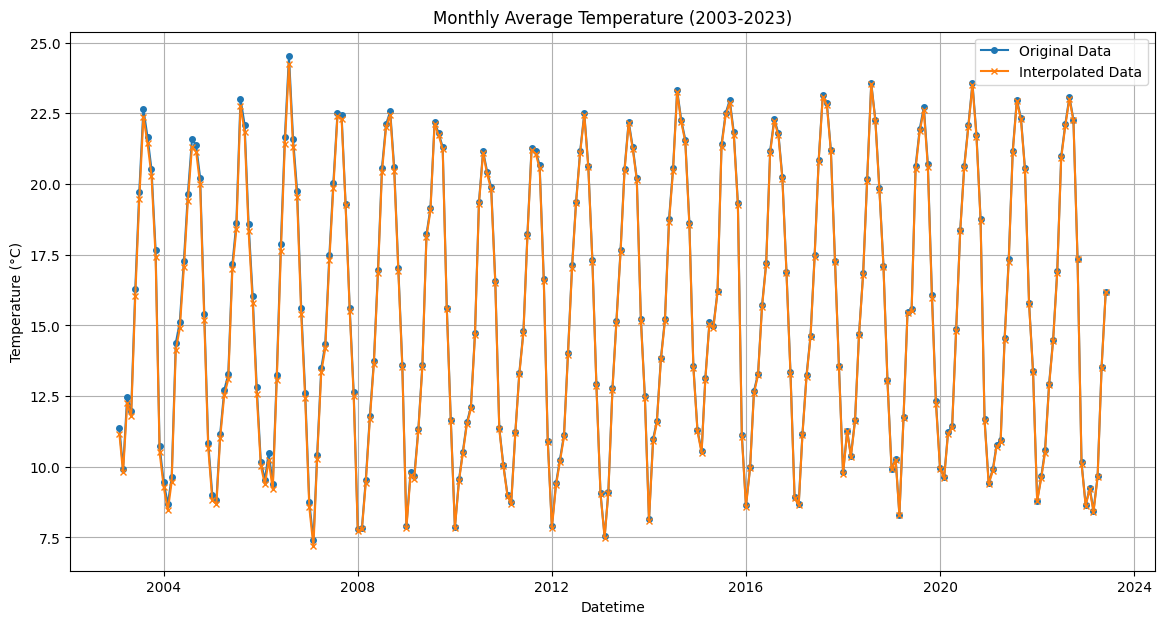

In [20]:
import matplotlib.pyplot as plt

# make copies to not alter original dataframes
plot_CA_stations = CA_stations.copy()
plot_CA_interpolated = CA_interpolated_df.copy()

plot_CA_stations['Datetime'] = pd.to_datetime(plot_CA_stations[['Year', 'Month', 'Day', 'Hour']])
plot_CA_interpolated['Datetime'] = pd.to_datetime(plot_CA_interpolated[['Year', 'Month', 'Day', 'Hour']])

plot_CA_stations.set_index('Datetime', inplace=True)
plot_CA_interpolated.set_index('Datetime', inplace=True)

monthly_avg_original = plot_CA_stations['temperature'].resample('ME').mean()
monthly_avg_interpolated = plot_CA_interpolated['temperature'].resample('ME').mean()

plt.figure(figsize=(14, 7))

plt.plot(monthly_avg_original.index, monthly_avg_original.values, 'o-', label='Original Data', markersize=4)

plt.plot(monthly_avg_interpolated.index, monthly_avg_interpolated.values, 'x-', label='Interpolated Data', markersize=4)

plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperature (2003-2023)')
plt.legend()
plt.grid(True)
plt.show()

## Handling Outliers

Outliers can skew our statistical analysis of the data. 

### 1. Visual Inspection

#### Boxplot

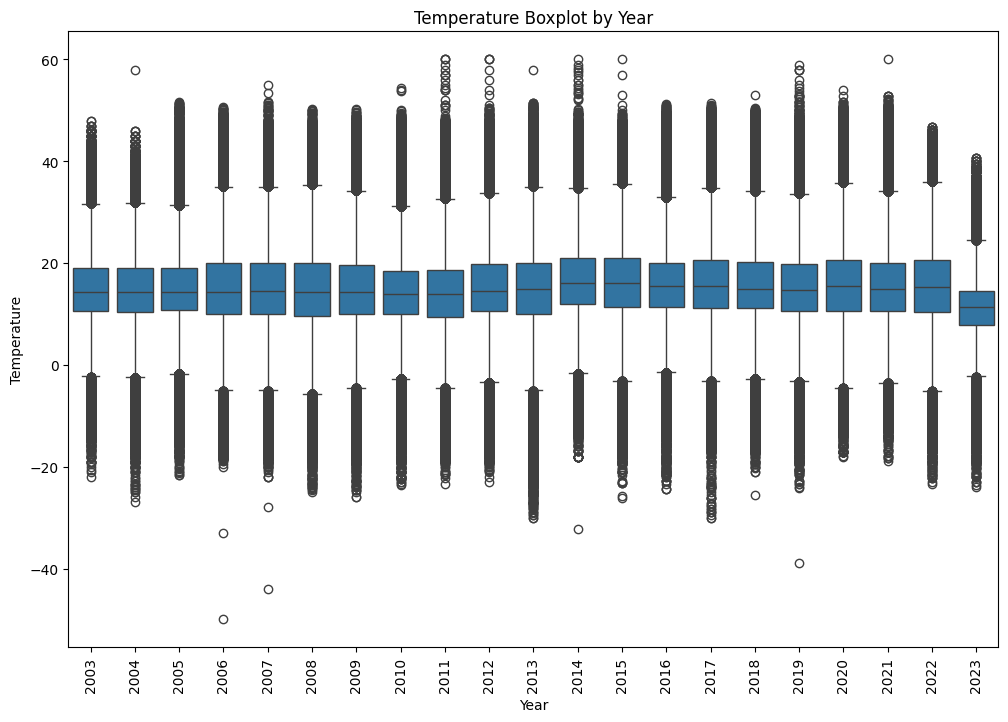

In [21]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='temperature', data=CA_interpolated_df)
plt.title('Temperature Boxplot by Year')
plt.xticks(rotation=90)  
plt.ylabel('Temperature')
plt.show()

### 2. Statistical Methods

#### Z-Score

In [22]:
from scipy import stats

# z_stations dataframe will have a Z_score column added to it
z_stations = CA_interpolated_df.copy()
z_stations['Z_score'] = stats.zscore(z_stations['temperature'])
z_thresh = 3

# calculate outliers using Z-score
z_outliers = z_stations[(z_stations['Z_score'] < -z_thresh) | (z_stations['Z_score'] > z_thresh)]
total_observations = z_stations.shape[0]

num_outliers = z_outliers.shape[0]

percent_outliers = (num_outliers / total_observations) * 100

print(f'{percent_outliers:.2f}% of the observations are outliers')

0.60% of the observations are outliers


### 3. Drop Outliers

In [23]:
z_stations_cleaned = z_stations[~((z_stations['Z_score'] < -z_thresh) | (z_stations['Z_score'] > z_thresh))]

# Drop the Z_score column as it's no longer needed
z_stations_cleaned = z_stations_cleaned.drop(columns=['Z_score'])

# The z_stations_cleaned dataframe now contains the data without the outliers
z_stations_cleaned.describe()

,Year,Month,Day,Hour,Latitude,Longitude,temperature
count,1.387433e+07,1.387433e+07,1.387433e+07,1.387433e+07,1.387433e+07,1.387433e+07,1.387433e+07
mean,2.012708e+03,6.449167e+00,1.572542e+01,1.148794e+01,3.672271e+01,-1.203521e+02,1.536198e+01
std,5.897443e+00,3.458328e+00,8.798101e+00,6.911419e+00,2.484989e+00,2.007980e+00,7.603982e+00
min,2.003000e+03,1.000000e+00,1.000000e+00,0.000000e+00,3.256810e+01,-1.242381e+02,-8.100000e+00
25%,2.008000e+03,3.000000e+00,8.000000e+00,6.000000e+00,3.429390e+01,-1.219244e+02,1.050000e+01
50%,2.013000e+03,6.000000e+00,1.600000e+01,1.100000e+01,3.723810e+01,-1.206442e+02,1.480000e+01
75%,2.018000e+03,9.000000e+00,2.300000e+01,1.700000e+01,3.850670e+01,-1.184472e+02,1.990000e+01
max,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,4.178360e+01,-1.161472e+02,3.900000e+01


### UTC to Local Time Conversion

In [24]:
z_stations_cleaned['Datetime'] = pd.to_datetime(z_stations_cleaned[['Year', 'Month', 'Day', 'Hour']])
z_stations_cleaned = z_stations_cleaned.drop(columns=['Year', 'Month', 'Day', 'Hour'])

z_stations_cleaned['Datetime_local'] = z_stations_cleaned['Datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
z_stations_cleaned['Year'] = z_stations_cleaned['Datetime_local'].dt.year
z_stations_cleaned['Month'] = z_stations_cleaned['Datetime_local'].dt.month
z_stations_cleaned['Day'] = z_stations_cleaned['Datetime_local'].dt.day
z_stations_cleaned['Hour'] = z_stations_cleaned['Datetime_local'].dt.hour
z_stations_cleaned = z_stations_cleaned.drop(columns=['Datetime', 'Datetime_local'])

# remove 2002 observations
z_stations_cleaned = z_stations_cleaned[z_stations_cleaned['Year'] != 2002]

# rearrange columns
cols = ['Station_ID','Station_name', 'Latitude', 'Longitude','Year','Month','Day','Hour','temperature']
z_stations_cleaned = z_stations_cleaned[cols]

In [25]:
z_stations_cleaned.head()   

,Station_ID,Station_name,Latitude,Longitude,Year,Month,Day,Hour,temperature
698,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,0,5.2
712,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,1,5.0
837,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,2,4.8
888,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,3,4.6
1002,USW00023224,AUBURN MUNI AP,38.9547,-121.0819,2003,1,1,4,4.3


### Write dataframe to csv files by year

In [26]:
output_folder = '../data/ghcn_clean'
os.makedirs(output_folder, exist_ok=True)

years = z_stations_cleaned['Year'].unique()

# Capitalize the temperature column to match the rest.
z_stations_cleaned = z_stations_cleaned.rename(columns={'temperature': 'Temperature'})
z_stations_cleaned.sort_values(by=['Station_ID', 'Year', 'Month', 'Day', 'Hour'], inplace=True)

for year in years:
    yearly_data = z_stations_cleaned[z_stations_cleaned['Year'] == year]
    output_file = os.path.join(output_folder, f'CA_{year}_clean.csv')
    yearly_data.to_csv(output_file, index=False)

print('New datafrane yearly files saved to ghcn_cleaned')

New datafrane yearly files saved to ghcn_clean
